<p style="font-size:30px; font-weight:bold">Imports</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from collections import deque 

from sklearn.metrics import mean_squared_error
from keras.models import load_model

<p style="font-size:30px; font-weight:bold">read full data from excel in 5 rows</p>

In [3]:
xls = pd.read_excel("Volve production data.xlsx" , sheet_name=['Dayle', 'Monthle']) #Read the 2 sheet of the excel file
data = xls["Dayle"]  #save the page1 dayle production to the data variabel
data_month = xls["Monthle"] #save the page2 monthle produciotn to the data_month variabel
print("Dayle production:")
display(data.head(5))   #display of the 5 row of the dayle produciont
print("-----------------------------------------------------------")
print("Monthly production:")
display(data_month.head(5)) #display of the 5 row of the monthle production

Dayle production:


DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...              %    0.00000   
1            0.0                    NaN  ...              %    0.00000   
2            0.0                    NaN  ...              %    0.00000   
3            0.0                    NaN  ...              %    0.00000   
4            0.0              310.37614  ...              %   33.09788   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0    0.00000        0.00000          0.0           0.0           0.0   
1    0.00000        0.00000          0.0           0.0           0.0   
2    0.00000        0.00000          0.0           0.0           0.0   
3    0.00000        0.00000          0.0           0.0           0.0   
4   10.47992       33.07195          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         WI  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

-----------------------------------------------------------
Monthly production:


Wellbore name  NPDCode    Year  Month  On Stream       Oil         Gas  \
0           NaN      NaN     NaN    NaN        hrs       Sm3         Sm3   
1    15/9-F-1 C   7405.0  2014.0    4.0      227.5  11142.47  1597936.65   
2    15/9-F-1 C   7405.0  2014.0    5.0  733.83334  24901.95  3496229.65   
3    15/9-F-1 C   7405.0  2014.0    6.0  705.91666  19617.76  2886661.69   
4    15/9-F-1 C   7405.0  2014.0    7.0  742.41666  15085.68  2249365.75   

     Water   GI   WI  
0      Sm3  Sm3  Sm3  
1        0  NaN  NaN  
2   783.48  NaN  NaN  
3  2068.48  NaN  NaN  
4  6243.98  NaN  NaN


<p style="font-size:30px; font-weight:bold">create a filtered dataframe </p>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'DATEPRD'),
  Text(1.5, 0, 'WELL_BORE_CODE'),
  Text(2.5, 0, 'NPD_WELL_BORE_CODE'),
  Text(3.5, 0, 'NPD_WELL_BORE_NAME'),
  Text(4.5, 0, 'NPD_FIELD_CODE'),
  Text(5.5, 0, 'NPD_FIELD_NAME'),
  Text(6.5, 0, 'NPD_FACILITY_CODE'),
  Text(7.5, 0, 'NPD_FACILITY_NAME'),
  Text(8.5, 0, 'ON_STREAM_HRS'),
  Text(9.5, 0, 'AVG_DOWNHOLE_PRESSURE'),
  Text(10.5, 0, 'AVG_DOWNHOLE_TEMPERATURE'),
  Text(11.5, 0, 'AVG_DP_TUBING'),
  Text(12.5, 0, 'AVG_ANNULUS_PRESS'),
  Text(13.5, 0, 'AVG_CHOKE_SIZE_P'),
  Text(14.5, 0, 'AVG_CHOKE_UOM'),
  Text(15.5, 0, 'AVG_WHP_P'),
  Text(16.5, 0, 'AVG_WHT_P'),
  Text(17.5, 0, 'DP_CHOKE_SIZE'),
  Text(18.5, 0, 'BORE_OIL_VOL'),
  Text(19.5, 0, 'BORE_GAS_VOL'),
  Text(20.5, 0, 'BORE_WAT_VOL'),
  Text(21.5, 0, 'BORE_WI_VOL'),
  Text(22.5, 0, 'FLOW_KIND'),
  Text(23.5, 0, 'WELL_TYPE')])

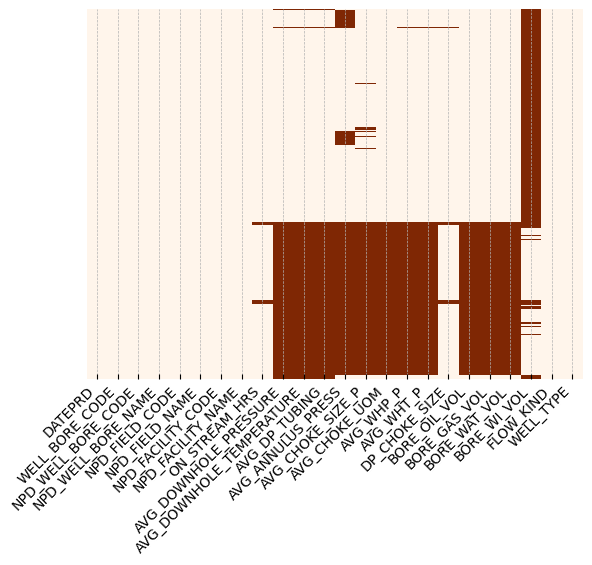

In [4]:
#view a heatmap diagram of all the fields in dataframe, 
#The red color represents the null values
A= sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Oranges')
plt.xticks(rotation = 45, ha = 'right')

In [5]:
# to get the type of well available (either Injector WI or producer OP)
data['WELL_TYPE'].unique()

array(['WI', 'OP'], dtype=object)

In [6]:
# this returns all the unique well codes, Here we see that there are total of 7 unique wells
data['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5693, 5769], dtype=int64)

In [7]:
data['NPD_WELL_BORE_CODE'].replace(7405, "well1", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(7078, "well2", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(5599, "well3", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(5351, "well4", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(7289, "well5", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(5693, "well6", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(5769, "well7", inplace=True)

data['NPD_WELL_BORE_CODE'].unique()

array(['well1', 'well2', 'well3', 'well4', 'well5', 'well6', 'well7'],
      dtype=object)

In [8]:
data[data['WELL_TYPE'] == 'WI']['NPD_WELL_BORE_CODE'].unique()

array(['well1', 'well6', 'well7'], dtype=object)

In [9]:
# filter only the producing well data which have well type as OP 
data[data['WELL_TYPE'] == 'OP']['NPD_WELL_BORE_CODE'].unique()

array(['well1', 'well2', 'well3', 'well4', 'well5', 'well7'], dtype=object)

In [10]:
# create a filtered/cleaned dataframe and store only the data for producer type wells for our anaysis
data_filter =data[data['WELL_TYPE'] == 'OP']

In [11]:
# the dataframe has many columns that are not useful for our analysis
# droping all these column in our filtered dataframe as these are not useful for our study
data_filter.drop(labels=['WELL_BORE_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_CODE',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                         'AVG_CHOKE_UOM',
                         'FLOW_KIND',
                         'WELL_TYPE'], axis=1)

DATEPRD NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
1     2014-04-08              well1            0.0                    NaN   
2     2014-04-09              well1            0.0                    NaN   
3     2014-04-10              well1            0.0                    NaN   
4     2014-04-11              well1            0.0              310.37614   
5     2014-04-12              well1            0.0              303.50078   
...          ...                ...            ...                    ...   
15628 2016-09-13              well7            0.0                    NaN   
15629 2016-09-14              well7            0.0                    NaN   
15630 2016-09-15              well7            0.0                    NaN   
15631 2016-09-16              well7            0.0                    NaN   
15632 2016-09-17              well7            0.0                    NaN   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
1                           NaN            NaN            0.00000   
2                           NaN            NaN            0.00000   
3                           NaN            NaN            0.00000   
4                      96.87589      277.27826            0.00000   
5                      96.92339      281.44744            0.00000   
...                         ...            ...                ...   
15628                       NaN            NaN            0.28463   
15629                       NaN            NaN            0.27272   
15630                       NaN            NaN            0.28686   
15631                       NaN            NaN            0.28604   
15632                       NaN            NaN            0.27212   

       AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
1              1.003059    0.00000    0.00000        0.00000           0.0   
2              0.979008    0.00000    0.00000        0.00000           0.0   
3              0.545759    0.00000    0.00000        0.00000           0.0   
4              1.215987   33.09788   10.47992       33.07195           0.0   
5              3.087015   22.05334    8.70429       22.05334           0.0   
...                 ...        ...        ...            ...           ...   
15628          0.673718    0.08545    0.22889        0.03741           0.0   
15629          0.636088    0.07776    0.22879        0.01862           0.0   
15630          0.670794    0.08545    0.22914        0.00631           0.0   
15631          0.664393    0.08544    0.22896        0.01181           0.0   
15632          0.624660    0.07497    0.22846        0.02576           0.0   

       BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
1               0.0           0.0          NaN  
2               0.0           0.0          NaN  
3               0.0           0.0          NaN  
4               0.0           0.0          NaN  
5               0.0           0.0          NaN  
...             ...           ...          ...  
15628           0.0           0.0          NaN  
15629           0.0           0.0          NaN  
15630           0.0           0.0          NaN  
15631           0.0           0.0          NaN  
15632           0.0           0.0          NaN  

[9143 rows x 15 columns]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'DATEPRD'),
  Text(1.5, 0, 'WELL_BORE_CODE'),
  Text(2.5, 0, 'NPD_WELL_BORE_CODE'),
  Text(3.5, 0, 'NPD_WELL_BORE_NAME'),
  Text(4.5, 0, 'NPD_FIELD_CODE'),
  Text(5.5, 0, 'NPD_FIELD_NAME'),
  Text(6.5, 0, 'NPD_FACILITY_CODE'),
  Text(7.5, 0, 'NPD_FACILITY_NAME'),
  Text(8.5, 0, 'ON_STREAM_HRS'),
  Text(9.5, 0, 'AVG_DOWNHOLE_PRESSURE'),
  Text(10.5, 0, 'AVG_DOWNHOLE_TEMPERATURE'),
  Text(11.5, 0, 'AVG_DP_TUBING'),
  Text(12.5, 0, 'AVG_ANNULUS_PRESS'),
  Text(13.5, 0, 'AVG_CHOKE_SIZE_P'),
  Text(14.5, 0, 'AVG_CHOKE_UOM'),
  Text(15.5, 0, 'AVG_WHP_P'),
  Text(16.5, 0, 'AVG_WHT_P'),
  Text(17.5, 0, 'DP_CHOKE_SIZE'),
  Text(18.5, 0, 'BORE_OIL_VOL'),
  Text(19.5, 0, 'BORE_GAS_VOL'),
  Text(20.5, 0, 'BORE_WAT_VOL'),
  Text(21.5, 0, 'BORE_WI_VOL'),
  Text(22.5, 0, 'FLOW_KIND'),
  Text(23.5, 0, 'WELL_TYPE')])

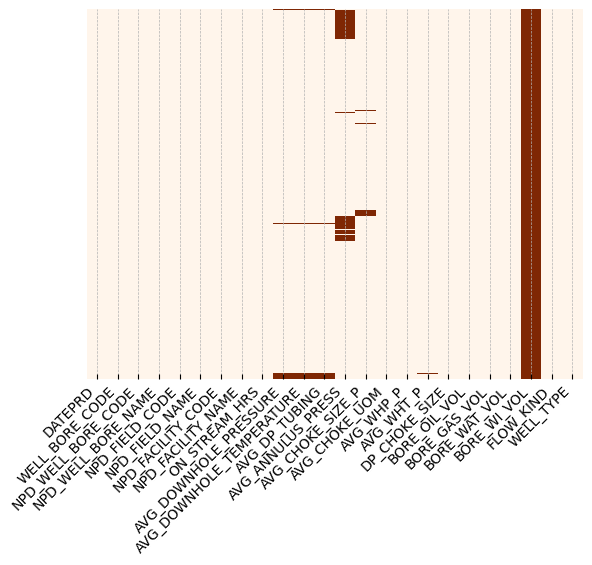

In [12]:
# After droping unuseful columns, we can again plot a heatmap plot to visualize null data in our dataframe
sns.heatmap(data_filter.isnull(),yticklabels=False,cbar=False,cmap='Oranges')
plt.xticks(rotation = 45, ha = 'right')

In [13]:
# counts number of data available for each well id
data_filter['NPD_WELL_BORE_CODE'].value_counts()

NPD_WELL_BORE_CODE
well3    3056
well4    3056
well2    1165
well5     978
well1     744
well7     144
Name: count, dtype: int64

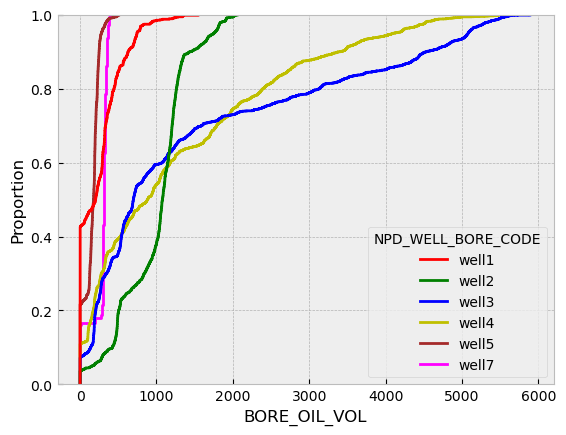

In [14]:
#from the seaborn library , we can use the Empirical Cumulative Distribution Function , and plot the oil production from all those wells having code as producers 
sns.ecdfplot(x='BORE_OIL_VOL',data=data_filter, hue='NPD_WELL_BORE_CODE',palette=['r', 'g', 'b', 'y', 'brown', 'magenta'])
plt.show()

In [15]:
# Another Scatter plot to show the oil production from these producer wells. Clearly the wells #7405, # 5769, #7289 production volume is insignificant
data_filter["NPD_WELL_BORE_CODE"] = data_filter["NPD_WELL_BORE_CODE"].astype(str)
fig = px.scatter(data_filter, x="DATEPRD", y="BORE_OIL_VOL",
                 color="NPD_WELL_BORE_CODE",
                 hover_name="NPD_WELL_BORE_CODE")
fig.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14580\1854844847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter["NPD_WELL_BORE_CODE"] = data_filter["NPD_WELL_BORE_CODE"].astype(str)


In [16]:
fig = px.line(data_filter, x="DATEPRD", y="BORE_OIL_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

In [17]:
fig = px.line(data_filter, x="DATEPRD", y="BORE_WAT_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

In [18]:
fig = px.line(data_filter, x="DATEPRD", y="BORE_GAS_VOL", color='NPD_WELL_BORE_CODE')
fig.show()

In [18]:
data_filter.head()

DATEPRD WELL_BORE_CODE NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
1 2014-04-08  NO 15/9-F-1 C              well1         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C              well1         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C              well1         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C              well1         15/9-F-1 C   
5 2014-04-12  NO 15/9-F-1 C              well1         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   
5         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
1            0.0                    NaN  ...              %    0.00000   
2            0.0                    NaN  ...              %    0.00000   
3            0.0                    NaN  ...              %    0.00000   
4            0.0              310.37614  ...              %   33.09788   
5            0.0              303.50078  ...              %   22.05334   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
1    0.00000        0.00000          0.0           0.0           0.0   
2    0.00000        0.00000          0.0           0.0           0.0   
3    0.00000        0.00000          0.0           0.0           0.0   
4   10.47992       33.07195          0.0           0.0           0.0   
5    8.70429       22.05334          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  
5          NaN  production         OP  

[5 rows x 24 columns]

In [19]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9143 entries, 1 to 15632
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   9143 non-null   datetime64[ns]
 1   WELL_BORE_CODE            9143 non-null   object        
 2   NPD_WELL_BORE_CODE        9143 non-null   object        
 3   NPD_WELL_BORE_NAME        9143 non-null   object        
 4   NPD_FIELD_CODE            9143 non-null   int64         
 5   NPD_FIELD_NAME            9143 non-null   object        
 6   NPD_FACILITY_CODE         9143 non-null   int64         
 7   NPD_FACILITY_NAME         9143 non-null   object        
 8   ON_STREAM_HRS             9143 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     8978 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8978 non-null   float64       
 11  AVG_DP_TUBING             8978 non-null   float64       
 12  AVG_ANNULUS_PRESS       

<p style="font-size:30px;">method pearson </p>

Text(0.5, 1.0, 'Correlation Heatmap')

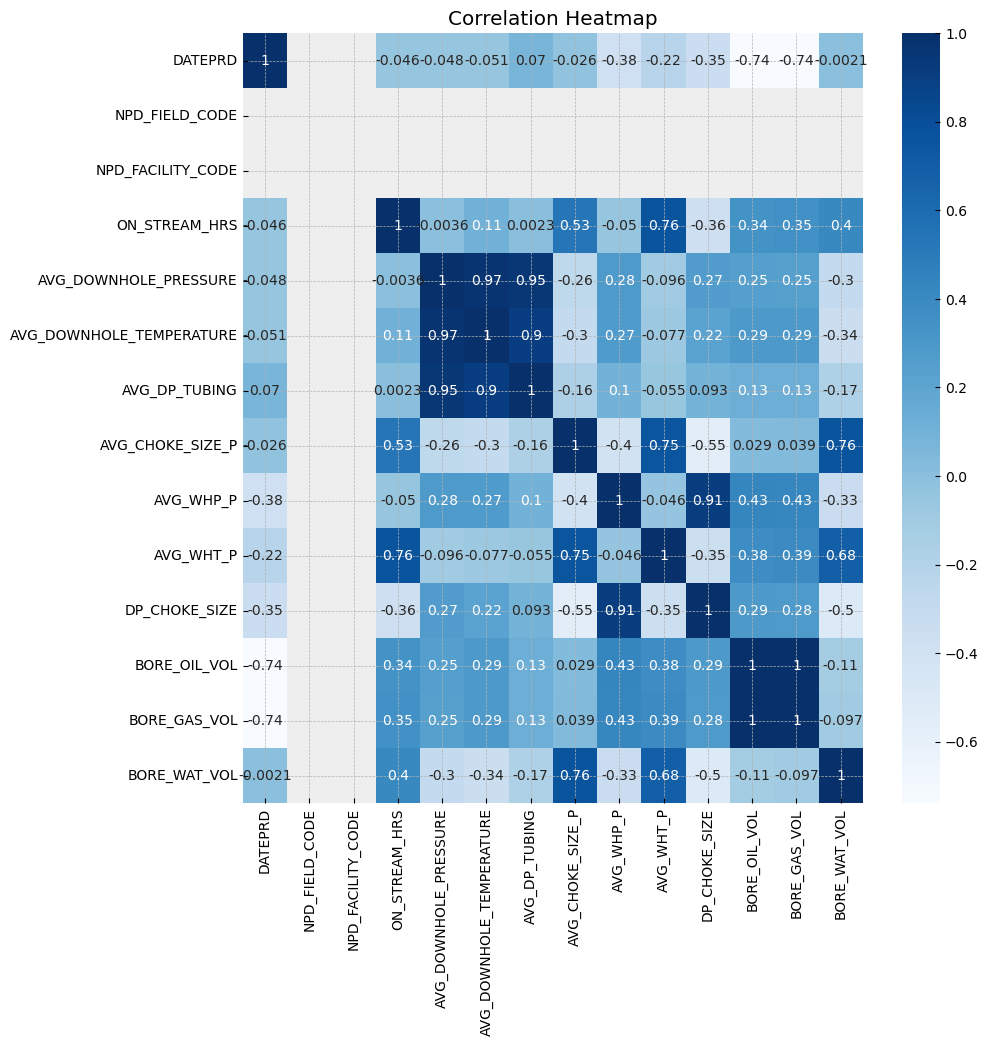

In [20]:
#to find correlation between different types of data available to us
A = data_filter.drop(["WELL_BORE_CODE",
                      "NPD_WELL_BORE_NAME",
                      "NPD_FIELD_NAME","AVG_CHOKE_UOM",
                      "FLOW_KIND","WELL_TYPE",
                      "NPD_FACILITY_NAME",
                      "BORE_WI_VOL",
                      "AVG_ANNULUS_PRESS"],axis=1)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(A.drop(["NPD_WELL_BORE_CODE"], axis=1).corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Heatmap")

<p style="font-size:30px;">found missing val </p>

In [21]:
missing_val_count_by_column = (A.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

AVG_DOWNHOLE_PRESSURE       165
AVG_DOWNHOLE_TEMPERATURE    165
AVG_DP_TUBING               165
AVG_CHOKE_SIZE_P            242
AVG_WHP_P                     6
AVG_WHT_P                    14
DP_CHOKE_SIZE                 6
dtype: int64


<p style="font-size:30px;">clear missing val </p>

In [22]:
#data_without_missing_values 
nan_clear = A.dropna(axis=0)
nan_clear.head()

DATEPRD NPD_WELL_BORE_CODE  NPD_FIELD_CODE  NPD_FACILITY_CODE  \
4 2014-04-11              well1         3420717             369304   
5 2014-04-12              well1         3420717             369304   
6 2014-04-13              well1         3420717             369304   
7 2014-04-14              well1         3420717             369304   
8 2014-04-15              well1         3420717             369304   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
4            0.0              310.37614                  96.87589   
5            0.0              303.50078                  96.92339   
6            0.0              303.53481                  96.95885   
7            0.0              303.78228                  96.96873   
8            0.0              303.85821                  97.02136   

   AVG_DP_TUBING  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
4      277.27826          1.215987   33.09788   10.47992       33.07195   
5      281.44744          3.087015   22.05334    8.70429       22.05334   
6      276.03200          1.962365   27.50281    9.42315       16.16326   
7      282.78676          0.000000   20.99552    8.13137       20.73712   
8      289.94067         31.141856   13.91754    8.49833       12.18153   

   BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  
4           0.0           0.0           0.0  
5           0.0           0.0           0.0  
6           0.0           0.0           0.0  
7           0.0           0.0           0.0  
8           0.0           0.0           0.0

<p style="font-size:30px;">Testing the code to make it work </p>

In [23]:
missing_val_count_by_column = (nan_clear.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


<p style="font-size:30px;">The output of the first stage </p>

In [24]:
data_filter.to_excel("filterd_data.xlsx")

In [25]:
nan_clear.to_excel("nan_clear.xlsx")

<p style="font-size:30px;">Second step: Algorithm ML </p>

<p style="font-size:30px;"> Normalization </p>

In [26]:
columns_to_noramal = ["ON_STREAM_HRS", "AVG_DOWNHOLE_PRESSURE", "AVG_DOWNHOLE_TEMPERATURE",
                      "AVG_DP_TUBING", "AVG_CHOKE_SIZE_P", "AVG_WHP_P", "AVG_WHT_P",
                     "DP_CHOKE_SIZE", "BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL"]
for column in columns_to_noramal: 
    nan_clear[column] = (nan_clear[column] -nan_clear[column].min()) / (nan_clear[column].max() - nan_clear[column].min())     
  
# view normalized data 
nan_clear["NPD_WELL_BORE_CODE"].unique()
# nan_clear

C:\Users\Asus\AppData\Local\Temp\ipykernel_15852\1231477265.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['well1', 'well2', 'well3', 'well4', 'well5'], dtype=object)

In [27]:
# # train = nan_clear.filter(lambda x: x["NPD_WELL_BORE_CODE"] != "well1")
# # test = nan_clear.filter(lambda x: x["NPD_WELL_BORE_CODE"] == "well1")
# well2, well3, well4, well5 = nan_clear.groupby("NPD_WELL_BORE_CODE").get_group("well2"), nan_clear.groupby("NPD_WELL_BORE_CODE").get_group("well3"), nan_clear.groupby("NPD_WELL_BORE_CODE").get_group("well4"), nan_clear.groupby("NPD_WELL_BORE_CODE").get_group("well5")
# train = pd.concat([well2, well3, well4, well5], axis=0)
# test = nan_clear.groupby("NPD_WELL_BORE_CODE").get_group("well1")
# train.head()

<h3>Split X and y</h3>

In [28]:
def preprocess_data(df):
    df = df.drop([
                "NPD_WELL_BORE_CODE",
                "DATEPRD",
                "NPD_FIELD_CODE",
                  "NPD_FACILITY_CODE",
                  "BORE_GAS_VOL",
                  "BORE_WAT_VOL",
                 ], axis=1)
    sequences = []
    last5_days = deque(maxlen = 5)
    for i  in df.values:
        
        last5_days.append([n for n in i[:-1]])   #تمام سطرها بجزتارگت
        if len(last5_days) == 5:
            sequences.append([np.array(last5_days), i[-1]]) #30روز اپند کن روز 30 ام تارگت بده
    #sequences: ستون اول x و ستون دوم target
    x = []
    y = []
    for seq, target  in sequences:
        x.append(seq)
        y.append(target)
    return np.array(x), np.array(y)

In [29]:
# X_train, y_train =  preprocess_data(train)
# X_test, y_test =  preprocess_data(test)
X, y = preprocess_data(nan_clear)

<h3>train70%-test30%</h3>

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# date = sorted(nan_clear.index.values)

In [32]:
# len(date)

In [33]:
# int(0.3 * len(date))

In [34]:
# last_30pct = sorted(nan_clear.index.values)[- int(0.3 * len(date))]
# last_30pct

<p style="font-size:30px;">First of last_30pct, it should be training, then it should be tested </p>

In [35]:
# nan_clear

In [36]:
# nan_clear = nan_clear.reset_index().drop("index", axis=1)
# nan_clear

In [37]:
# test = nan_clear[(nan_clear.index >= last_30pct)]
# train = nan_clear[(nan_clear.index < last_30pct)]

In [38]:
 # len(test)

In [39]:
 # len(train)

<h3>X , Y train and test / Y mean target</h3>

In [40]:
# train_x, train_y = preprocess_data(train)

In [41]:
# print(train_x)

In [42]:
# train_x.shape

In [43]:
# train_y.shape

In [44]:
# test_x, test_y = preprocess_data(test)

In [45]:
X_train.shape

(6113, 5, 8)

In [46]:
X_test.shape

(2621, 5, 8)

<h3>deque for 30 days</h3>

In [47]:
#norm_data = norm_data.drop(["NPD_FIELD_CODE","NPD_FACILITY_CODE","BORE_GAS_VOL","BORE_WAT_VOL"], axis=1)
#def production_df(df): 
 #   production = []
  #  last30_days = deque(maxlen = 30)
   # for i  in df:
    #    last30_days.append([n for n in i[:-3]])
     #   if len(last30_days) == 30:
      #      production.append([np.array(last30_days), i[-1]])   
            
    #return  production

#production = production_df(norm_data.values)

In [48]:
#x_train = production[:int(0.7*len(production))][0]
#y_train = production[:int(0.7*len(production))][1]

#x_test = production[int(0.7*len(production)):][0]
#y_test = production[int(0.7*len(production)):][1]

#len(x_train)

<h3>Testing the correct working of the code</h3>

In [49]:
norm_data["BORE_OIL_VOL"][29]

NameError: name 'norm_data' is not defined

In [50]:
production[0][1]

NameError: name 'production' is not defined

<p style="font-size:30px;"> Make a model LSTM </p>

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

In [52]:
model = Sequential()
model.add(LSTM(128, input_shape = (X_train.shape[1:]), return_sequences= True))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences= True))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(BatchNormalization())          
          
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1))

In [53]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam', metrics=['mean_squared_error'])

In [54]:
#model.compile(loss = 'mean_squared_error',optimizer = 'Adam')

In [55]:
history = model.fit(X_train, y_train, batch_size = 50, epochs= 50, validation_data= (X_test, y_test))

Epoch 1/50


123/123 [==============================] - 8s 22ms/step - loss: 0.1531 - mean_squared_error: 0.1531 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 2/50
123/123 [==============================] - 2s 13ms/step - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 3/50
123/123 [==============================] - 2s 13ms/step - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 4/50
123/123 [==============================] - 2s 13ms/step - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 5/50
123/123 [==============================] - 2s 14ms/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 6/50
123/123 [==============================] - 2s 14ms/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 7/50
123/123 [

In [202]:
# Make predictions using the trained model
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Print the evaluation results
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Squared Error (MSE):  0.0031031602419290686
Root Mean Squared Error (RMSE):  0.05570601620946403


In [203]:
r2_score(y_test, y_pred)

0.9348304878395607

Text(0, 0.8, 'R2 = 0.9348304878395607')

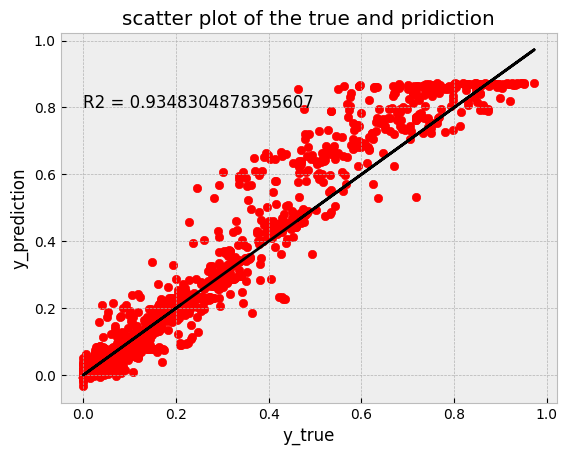

In [204]:
plt.scatter(y_test, y_pred, color="green")
plt.plot(y_test, y_test, color="black")
plt.title("scatter plot of the true and pridiction")
plt.xlabel("y_true")
plt.ylabel("y_prediction")
plt.text(0, 0.8, "R2 = {}".format(r2_score(y_test, y_pred)), fontsize = 12)
# plt.plot(y_pred)

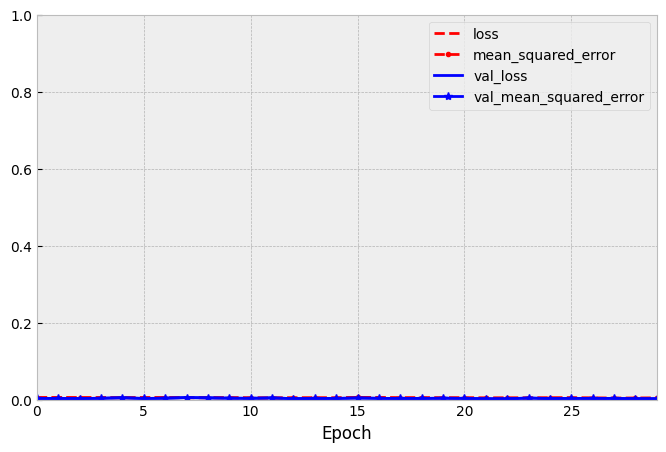

In [205]:
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

 <h3>Make a model MLP + LSTM </h3>

In [206]:
model = Sequential()
model.add(Dense(8, input_shape = (X_train.shape[1:])))

model.add(Dense(128))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128))
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(LSTM(128, return_sequences= True))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences= True))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(BatchNormalization())          
          
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1))

C:\Users\mehrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [207]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam', metrics=['mean_squared_error'])

In [208]:
history = model.fit(X_train, y_train, batch_size = 50, epochs= 50, validation_data= (X_test, y_test))

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.5769 - mean_squared_error: 0.5769 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - val_lo

In [209]:
# Make predictions using the trained model
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Print the evaluation results
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Mean Squared Error (MSE):  0.00475189677256762
Root Mean Squared Error (RMSE):  0.06893400302149601


In [210]:
r2_score(y_test, y_pred)

0.9002053486247016

Text(0, 0.8, 'R2 = 0.9002053486247016')

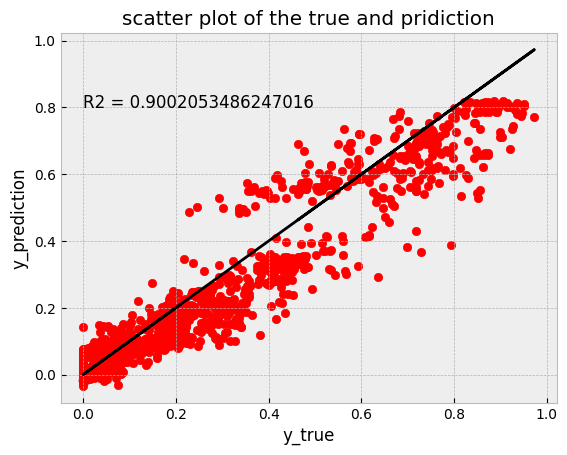

In [211]:
plt.scatter(y_test, y_pred, color="red")
plt.plot(y_test, y_test, color="black")
plt.title("scatter plot of the true and pridiction")
plt.xlabel("y_true")
plt.ylabel("y_prediction")
plt.text(0, 0.8, "R2 = {}".format(r2_score(y_test, y_pred)), fontsize = 12)
# plt.plot(y_pred)

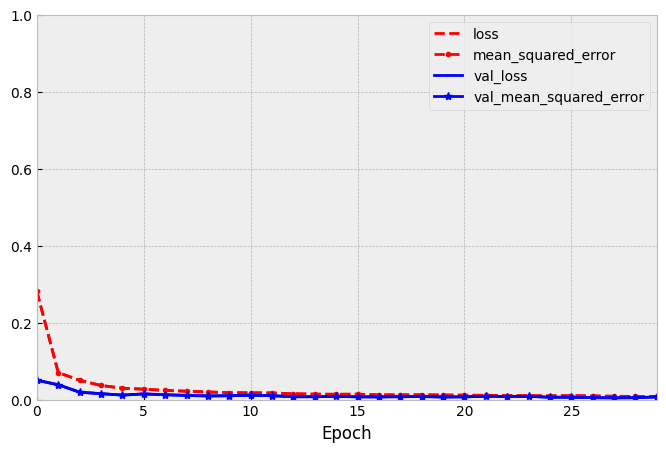

In [212]:
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()